# Derivative of Möbius T

In [1]:
%display latex
var('a b c d z x')

(a, b, c, d, z, alpha)

In [59]:
T = lambda M: (M[0,0]*z + M[0,1])/(M[1,0]*z+M[1,1])

In [60]:
M = matrix([[a,b],[c,d]])
T(M)

(a*z + b)/(c*z + d)

In [4]:
factor(diff(T(M),z))

-(b*c - a*d)/(c*z + d)^2

In [58]:
D = lambda M: matrix([[0,sqrt(det(M))],[M[1,0],M[1,1]]])

In [6]:
T(D(M))^2

-(b*c - a*d)/(c*z + d)^2

Thus we get
$$ \frac{d}{dz} T_M(z) = T_{D(M)}^2(z) $$

In particular, if for matrices $M,M'$ we have $det(M) = det(M')$ and $M_{1,\bullet} = M'_{1,\bullet}$, then $T_M - T_{M'}$ is a constant.

In [7]:
f2 = T(matrix([[2,1],[1,1]]))
f2, factor(diff(f2,z))

((2*z + 1)/(z + 1), (z + 1)^(-2))

In [8]:
factor(T(M) + alpha)

(alpha*c*z + alpha*d + a*z + b)/(c*z + d)

# Recovering a,b,c,d from Möbius T

The standard method involves pluggin in the projective points $0,1,\infty \in \mathbb{P}^1$, and let $f = T_M, M=\{m_{i,j}\}$.

$$ f(\infty) \simeq \lambda M (1,0)^t = \lambda (m_{0,0},m_{1,0})^t $$
$$ f(0) \simeq \mu M (0,1)^t = \mu (m_{0,1},m_{1,1})^t $$
$$ f(1) \simeq \nu M (1,1)^t = \begin{pmatrix} \lambda m_{0,0}&\mu m_{0,1}\\\lambda m_{1,0}&\mu m_{1,1}\end{pmatrix}(\nu\lambda^{-1},\nu\mu^{-1})^t $$

Solve for $(\nu\lambda^{-1},\nu\mu^{-1})$, then we obtain
$$ \nu M = 
\begin{pmatrix} \lambda m_{0,0}&\mu m_{0,1}\\\lambda m_{1,0}&\mu m_{1,1}\end{pmatrix}
\begin{pmatrix} \nu\lambda^{-1}&0\\0&\nu\mu^{-1}\end{pmatrix}
$$

with known quantities on the right-hand side.


In [9]:
f = T(M)
(f(z=-1),f(z=0),f(z=1),limit(f,z=oo))

def S(f):
    # we don't consider cases where below limits don't exist
    A = limit(f, z=oo)
    B = limit(f, z=0)
    C = limit(f, z=1)
    
    ab = matrix([[A,B],[1,1]])
    c = ab.inverse() * vector([C,1])
    
    return factor(ab * diagonal_matrix(c))

display(S(f))

[a/(c + d) b/(c + d)]
[c/(c + d) d/(c + d)]

# integration problem

In [45]:
T(M)*T(D(M))^2

-(b*c - a*d)*(a*z + b)/(c*z + d)^3

In [105]:
m = matrix([[1,10],[-1,30]])
fi = T(m.inverse())
n = 5
display((det(m),fi(z=0),f(z=1)))
display((n+1)*factor(T(m)^n*T(D(m))^2))
integrate((n+1)*factor(T(m)^n*T(D(m))^2),z,fi(z=0),fi(z=1))

(40, -10, -1)

-240*(z + 10)^5/(z - 30)^7

1

Let $M = \begin{pmatrix}1&0\\-1&2m\end{pmatrix}$, then

$$ f(x) = \frac{x}{2m-x}, \quad f(0) = 0, \quad f(m) = 1 $$

 and

$$ \frac{1}{n+1} = \int_0^1 t^n \,dt = \int_{0}^{m} \frac{2m x^n}{(2m-x)^{n+2}} \,dx $$

### Example-Exercise

$$\int_0^m \frac{x^n}{(2m-x)^{n+2}} \,dx \quad (n \geq 0)$$

1

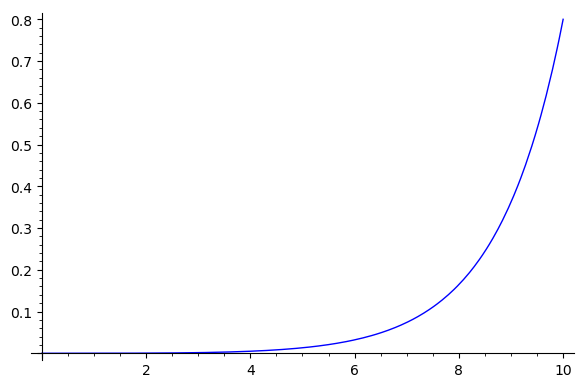

In [137]:
f = (3+1)*2*10*x^3 / (2*10 - x)^(3+2)
display(integrate(f,x,0,10))
plot(f,x,0,10)

In [138]:
integrate(1/((x-1)*(x+1)^2),x)

1/2/(x + 1) - 1/4*log(x + 1) + 1/4*log(x - 1)